In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats

In [28]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [30]:
df['nuisance'].value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

In [32]:
df['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [27]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  3.015500e+04  3.015500e+04  30155.000000  30155.000000  30155.000000   
mean   4.538104e+09  1.108536e+06      3.413530      2.334737   2112.424739   
std    2.882587e+09  8.963857e+05      0.981612      0.889556    974.044318   
min    1.000055e+06  2.736000e+04      0.000000      0.000000      3.000000   
25%    2.064175e+09  6.480000e+05      3.000000      2.000000   1420.000000   
50%    3.874011e+09  8.600000e+05      3.000000      2.500000   1920.000000   
75%    7.287100e+09  1.300000e+06      4.000000      3.000000   2619.500000   
max    9.904000e+09  3.075000e+07     13.000000     10.500000  15360.000000   

           sqft_lot        floors    sqft_above  sqft_basement   sqft_garage  \
count  3.015500e+04  30155.000000  30155.000000   30155.000000  30155.000000   
mean   1.672360e+04      1.543492   1809.826098     476.039396    330.211142   
std    6.038260e+04      0.567717    878.306131     579.631302    285.770536   
min    4.020000e+02      1.000000      2.000000       0.000000      0.000000   
25%    4.850000e+03      1.000000   1180.000000       0.000000      0.000000   
50%    7.480000e+03      1.500000   1560.000000       0.000000    400.000000   
75%    1.057900e+04      2.000000   2270.000000     940.000000    510.000000   
max    3.253932e+06      4.000000  12660.000000    8020.000000   3580.000000   

         sqft_patio      yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  30155.000000  
mean     217.412038   1975.163953     90.922301     47.328076   -121.317397  
std      245.302792     32.067362    416.473038      1.434005      5.725475  
min        0.000000   1900.000000      0.000000     21.274240   -157.791480  
25%       40.000000   1953.000000      0.000000     47.405320   -122.326045  
50%      150.000000   1977.000000      0.000000     47.551380   -122.225585  
75%      320.000000   2003.000000      0.000000     47.669913   -122.116205  
max     4370.000000   2022.000000   2022.000000     64.824070    -70.074340

In [39]:
addresses = df['address'].str.split()
addresses

0        [2102, Southeast, 21st, Court,, Renton,, Washi...
1        [11231, Greenwood, Avenue, North,, Seattle,, W...
2        [8504, South, 113th, Street,, Seattle,, Washin...
3        [4079, Letitia, Avenue, South,, Seattle,, Wash...
4        [2193, Northwest, Talus, Drive,, Issaquah,, Wa...
                               ...                        
30150    [4673, Eastern, Avenue, North,, Seattle,, Wash...
30151    [4131, 44th, Avenue, Southwest,, Seattle,, Was...
30152    [910, Martin, Luther, King, Jr, Way,, Seattle,...
30153    [17127, 114th, Avenue, Southeast,, Renton,, Wa...
30154    [18615, 7th, Avenue, South,, Burien,, Washingt...
Name: address, Length: 30155, dtype: object

In [42]:
for str in addresses:
    print(str[-5])

Renton,
Seattle,
Seattle,
Seattle,
Issaquah,
Shoreline,
Burien,
Kent,
Way,
Duvall,
Seattle,
Kent,
Omaha,
Auburn,
Way,
Seattle,
Bellevue,
Seattle,
Seattle,
Seattle,
Bellevue,
Valley,
Renton,
Woodinville,
Seattle,
Kent,
Redmond,
Medina,
Seattle,
Bellevue,
Kent,
Seattle,
Park,
SeaTac,
Shoreline,
Seattle,
Hill,
Bend,
Kent,
Auburn,
Renton,
Redmond,
Bellevue,
Bothell,
Bellevue,
Auburn,
Seattle,
Park,
Kent,
Duvall,
Kirkland,
Seattle,
Burien,
New
Seattle,
Moines,
Auburn,
Seattle,
Auburn,
Way,
Bellevue,
Seattle,
McLeansboro,
Redmond,
Seattle,
Kirkland,
Issaquah,
Renton,
Renton,
Kirkland,
Seattle,
Newcastle,
Bellevue,
Kirkland,
Island,
Bend,
Redmond,
Carnation,
Seattle,
Redmond,
Kent,
Burien,
Seattle,
Seattle,
Seattle,
Park,
Sammamish,
Seattle,
Seattle,
Way,
Auburn,
Seattle,
Seattle,
Kent,
Seattle,
Redmond,
Seattle,
Seattle,
Issaquah,
Kent,
Way,
Duvall,
Issaquah,
Seattle,
Seattle,
Seattle,
Seattle,
Snoqualmie,
Way,
Enumclaw,
Woodinville,
Renton,
Auburn,
Seattle,
Covington,
Seattle,
Shoreline,
Re

TypeError: unhashable type: 'list'

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True, axis=1)

In [ ]:
df.isnull().sum()

In [23]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.034184 -0.006306  -0.012094    -0.027932 -0.119101   
price         -0.034184  1.000000  0.289204   0.480401     0.608521  0.085730   
bedrooms      -0.006306  0.289204  1.000000   0.589273     0.637874  0.003306   
bathrooms     -0.012094  0.480401  0.589273   1.000000     0.772677  0.035886   
sqft_living   -0.027932  0.608521  0.637874   0.772677     1.000000  0.119563   
sqft_lot      -0.119101  0.085730  0.003306   0.035886     0.119563  1.000000   
floors         0.032043  0.180576  0.147592   0.404412     0.304240 -0.032097   
sqft_above    -0.023216  0.538651  0.547164   0.674924     0.883984  0.129231   
sqft_basement -0.014662  0.245058  0.238502   0.260902     0.338460  0.004111   
sqft_garage   -0.007829  0.264169  0.319441   0.457022     0.511740  0.087169   
sqft_patio    -0.041625  0.313409  0.183439   0.327551     0.396030  0.155250   
yr_built       0.023071  0.096013  0.146191   0.443648     0.291694  0.001750   
yr_renovated  -0.029131  0.084786  0.014286   0.040631     0.038499  0.010049   
lat           -0.000691  0.063632  0.108758  -0.005225     0.102186  0.030020   
long           0.000479 -0.022509 -0.106689   0.017400    -0.087669 -0.034308   

                 floors  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
id             0.032043   -0.023216      -0.014662    -0.007829   -0.041625   
price          0.180576    0.538651       0.245058     0.264169    0.313409   
bedrooms       0.147592    0.547164       0.238502     0.319441    0.183439   
bathrooms      0.404412    0.674924       0.260902     0.457022    0.327551   
sqft_living    0.304240    0.883984       0.338460     0.511740    0.396030   
sqft_lot      -0.032097    0.129231       0.004111     0.087169    0.155250   
floors         1.000000    0.448281      -0.248093     0.132656    0.125183   
sqft_above     0.448281    1.000000      -0.066801     0.560551    0.312117   
sqft_basement -0.248093   -0.066801       1.000000     0.026361    0.210500   
sqft_garage    0.132656    0.560551       0.026361     1.000000    0.216354   
sqft_patio     0.125183    0.312117       0.210500     0.216354    1.000000   
yr_built       0.544646    0.387448      -0.230226     0.447560    0.138409   
yr_renovated  -0.025449    0.010598       0.053634    -0.098603    0.056385   
lat           -0.218554    0.092258       0.059788     0.092346   -0.019724   
long           0.233781   -0.082744      -0.045208    -0.096861    0.025699   

               yr_built  yr_renovated       lat      long  
id             0.023071     -0.029131 -0.000691  0.000479  
price          0.096013      0.084786  0.063632 -0.022509  
bedrooms       0.146191      0.014286  0.108758 -0.106689  
bathrooms      0.443648      0.040631 -0.005225  0.017400  
sqft_living    0.291694      0.038499  0.102186 -0.087669  
sqft_lot       0.001750      0.010049  0.030020 -0.034308  
floors         0.544646     -0.025449 -0.218554  0.233781  
sqft_above     0.387448      0.010598  0.092258 -0.082744  
sqft_basement -0.230226      0.053634  0.059788 -0.045208  
sqft_garage    0.447560     -0.098603  0.092346 -0.096861  
sqft_patio     0.138409      0.056385 -0.019724  0.025699  
yr_built       1.000000     -0.239284 -0.207186  0.209878  
yr_renovated  -0.239284      1.000000  0.036956 -0.035631  
lat           -0.207186      0.036956  1.000000 -0.760766  
long           0.209878     -0.035631 -0.760766  1.000000

In [26]:
df.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [ ]:
sqft_living,  sqft_above bathrooms.                   

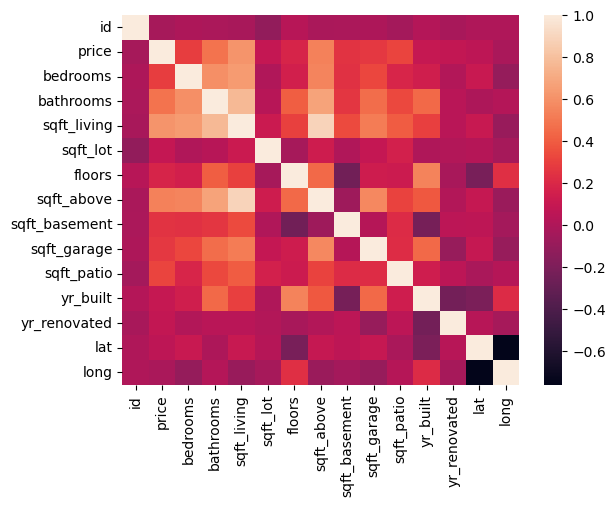

In [56]:
sns.heatmap(df.corr());

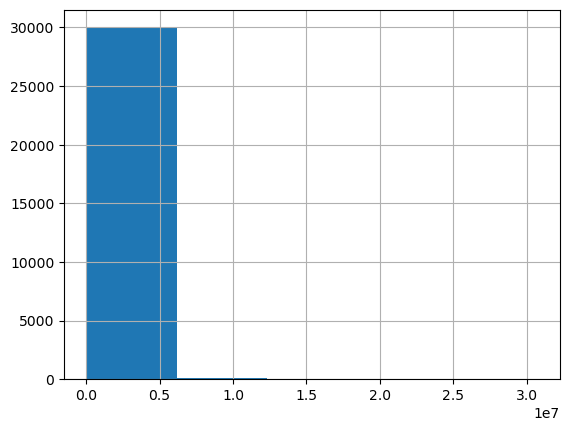

In [55]:
df['price'].hist(bins=5);

<Figure size 10000x10000 with 0 Axes>

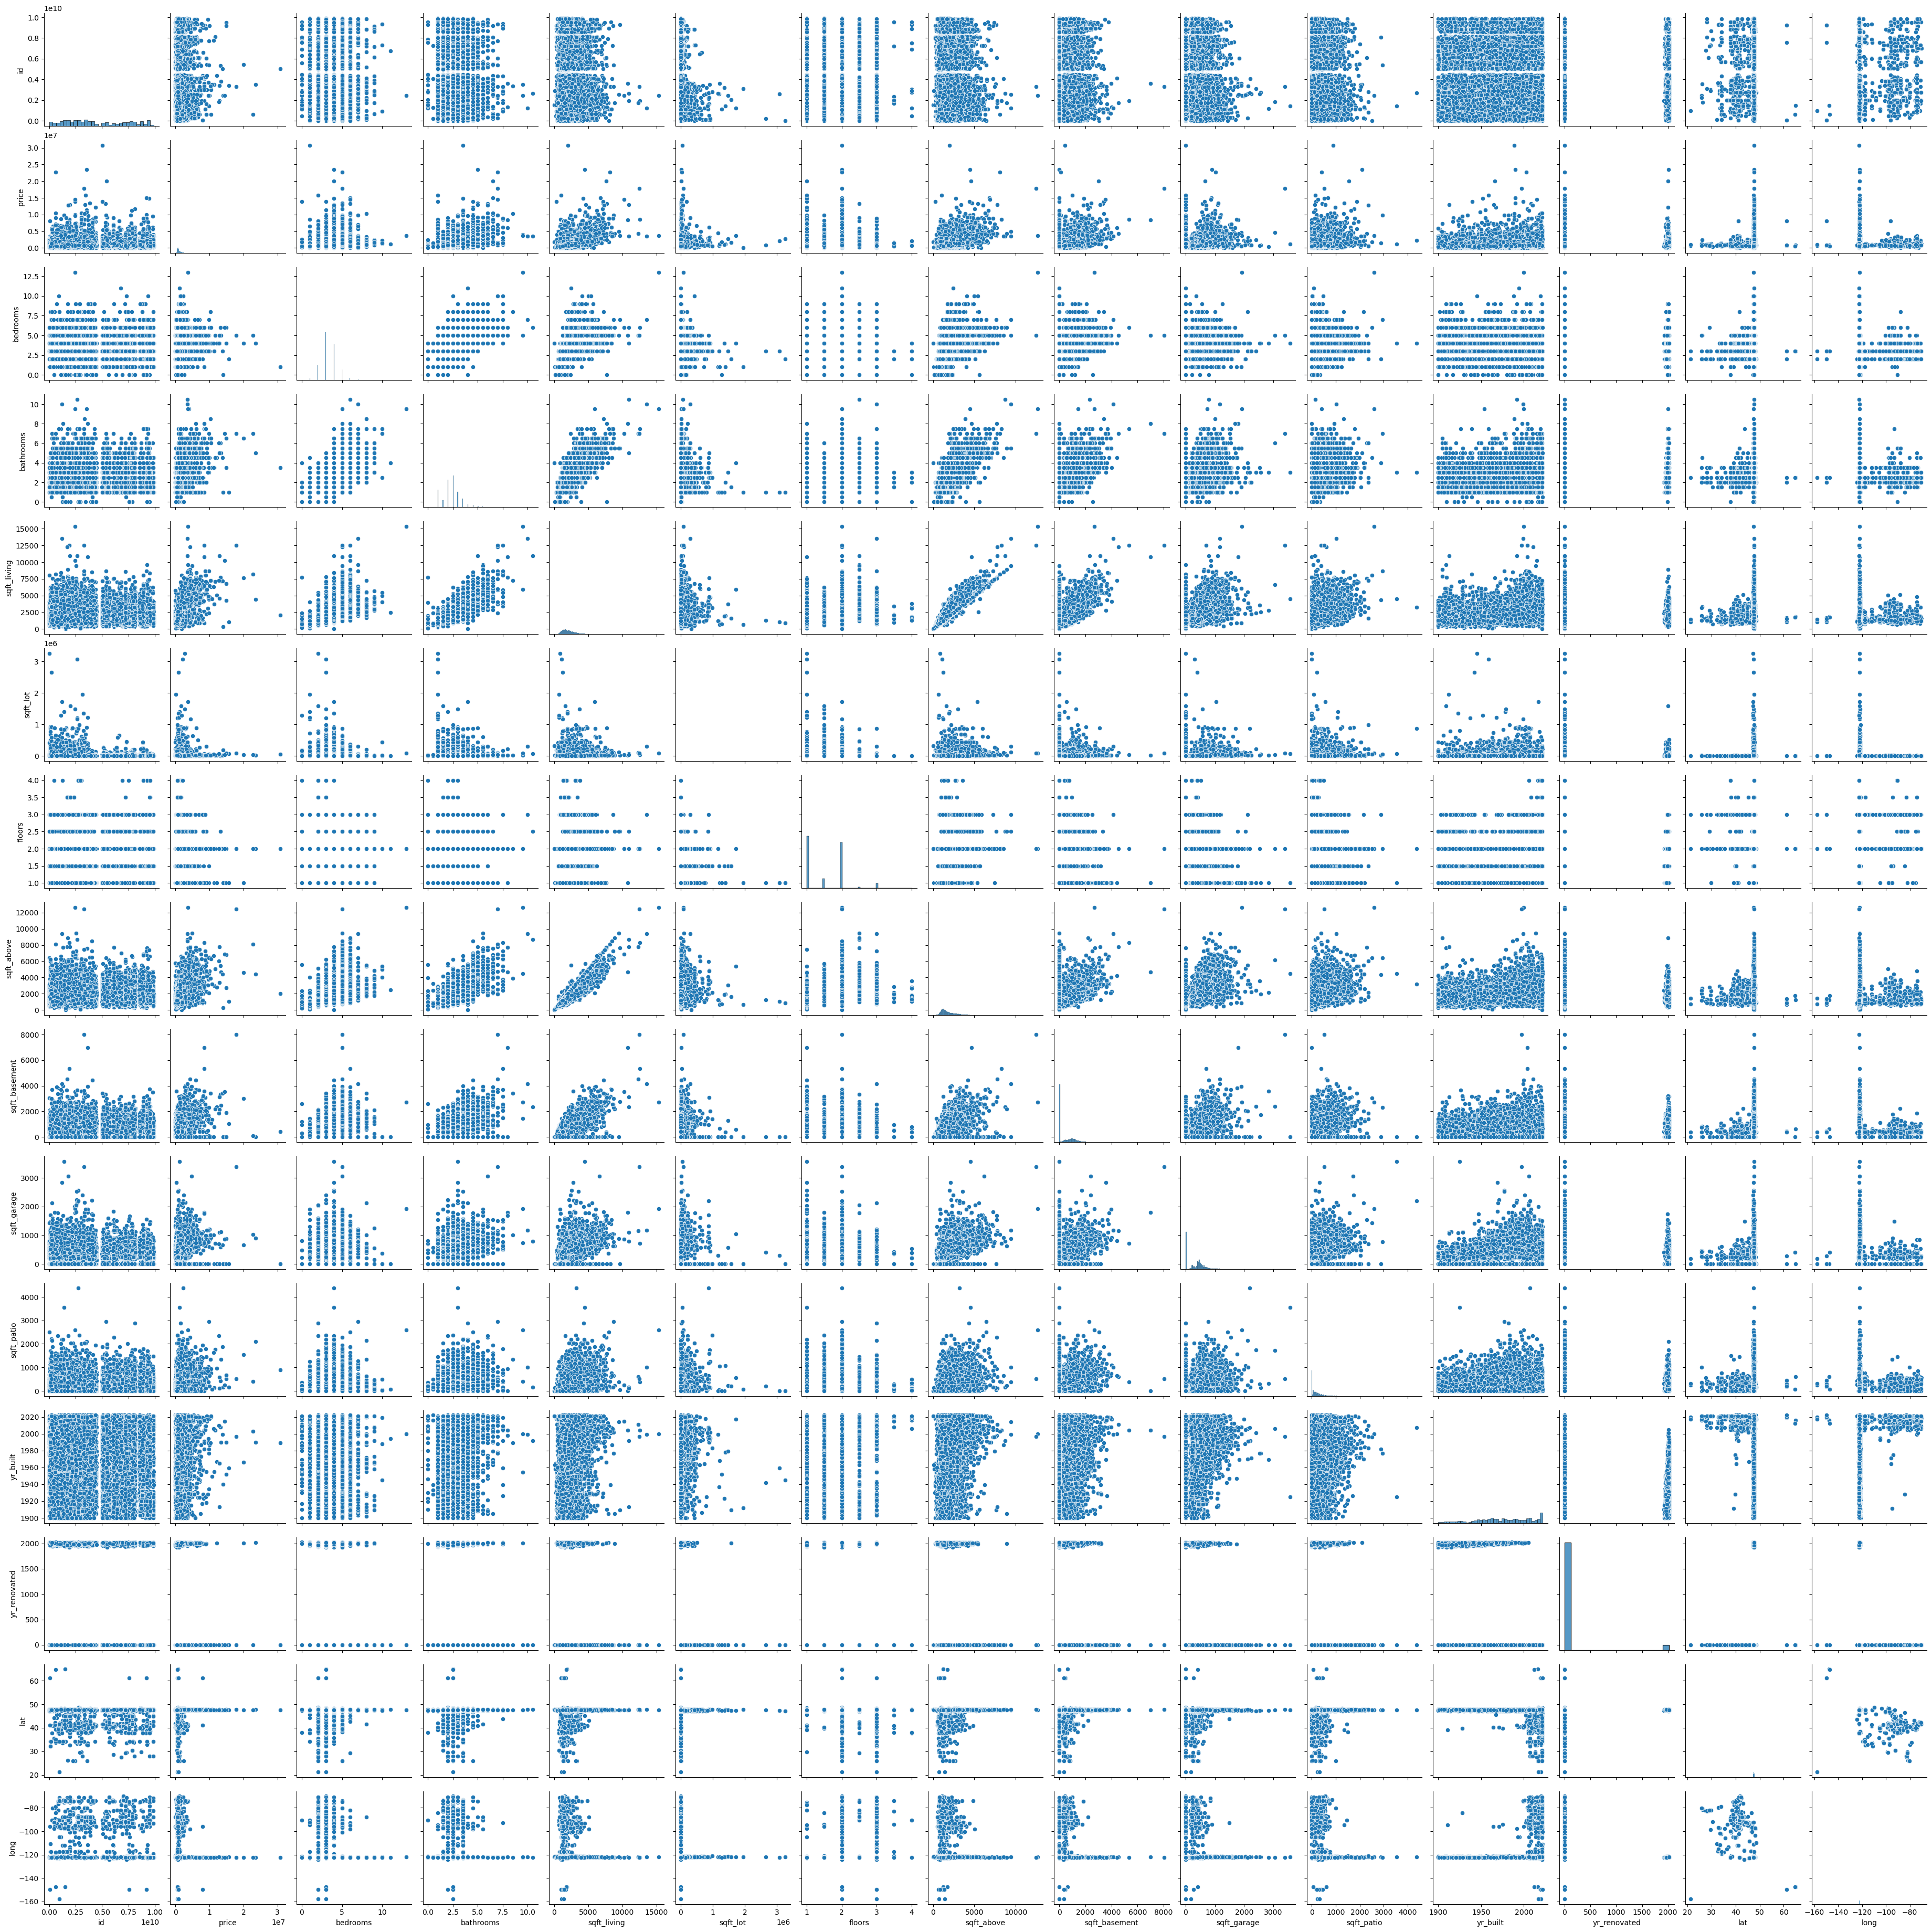

In [52]:
plt.figure(figsize=(100, 100))
sns.pairplot(df);

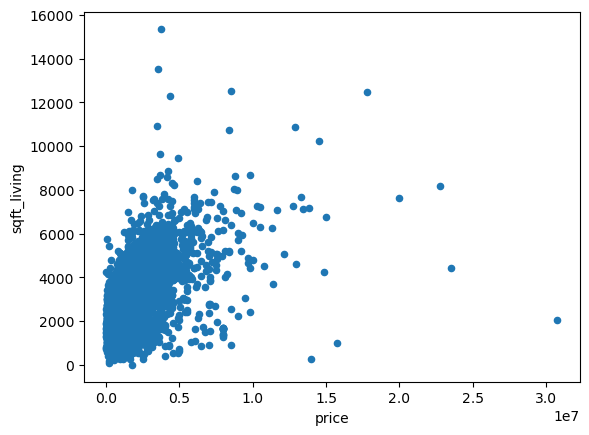

In [45]:
df.plot.scatter(x="price", y="sqft_living");

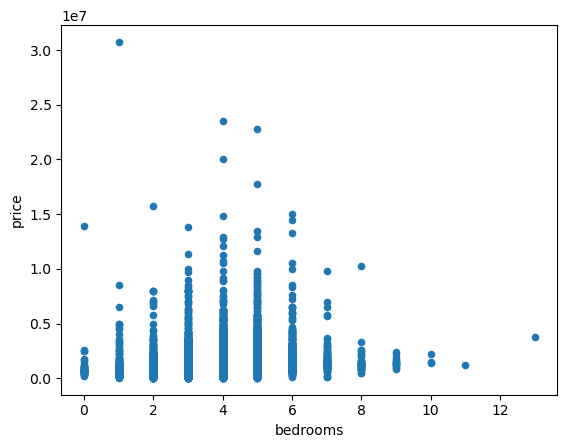

In [106]:
df.plot.scatter(x="bedrooms", y="price");

In [64]:
df['bathrooms'].value_counts()

2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
0.0       31
6.5       25
7.0       12
7.5       12
0.5        5
9.5        2
8.0        2
10.5       1
10.0       1
8.5        1
Name: bathrooms, dtype: int64

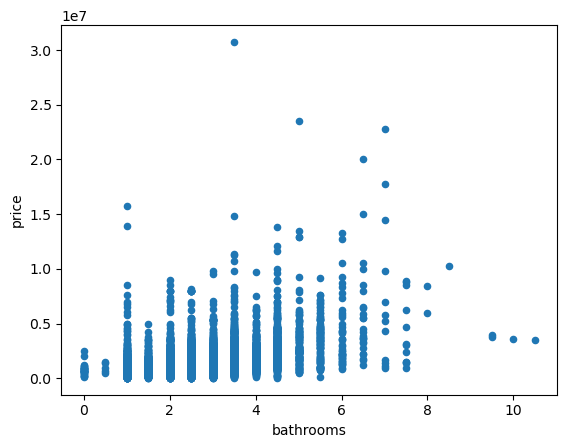

In [65]:
df.plot.scatter(x="bathrooms", y="price");

In [48]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [49]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        06:55:34   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

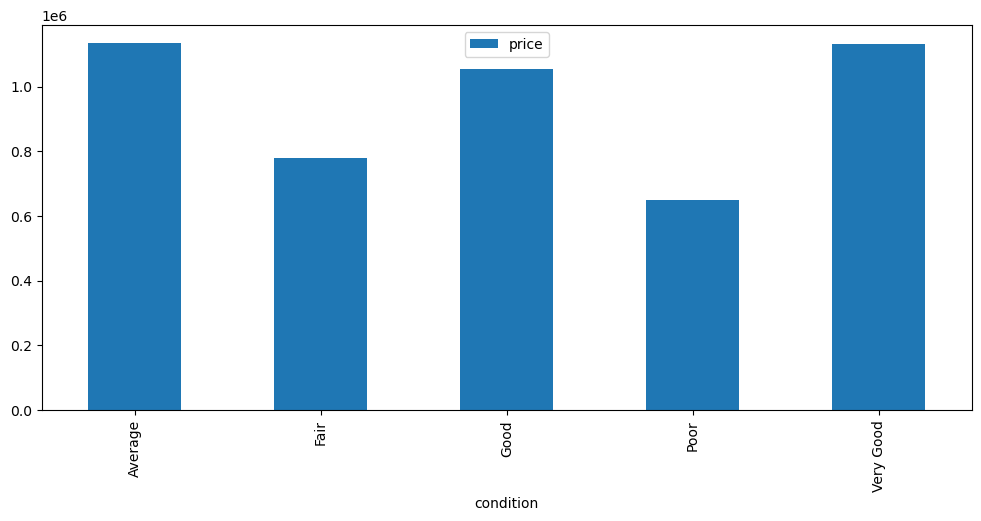

In [57]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby("condition").mean().plot.bar(y="price", ax=ax);

In [97]:
df1 = df.copy()

In [98]:
df1 = pd.get_dummies(df1, columns=["condition"]) #, drop_first=True
df1.drop('condition_Poor', axis=1, inplace=True)
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Very Good'],
      dtype='object')

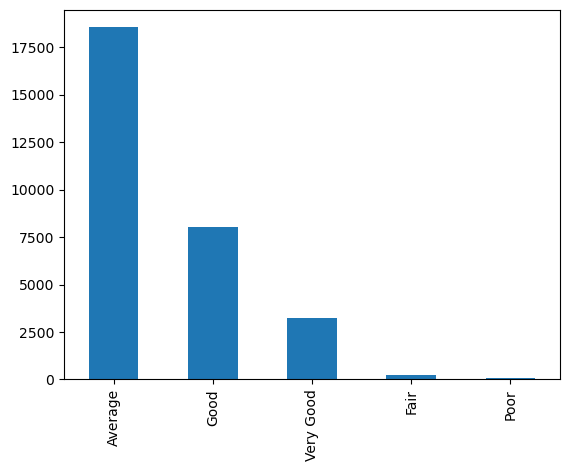

In [74]:
df["condition"].value_counts().plot.bar();

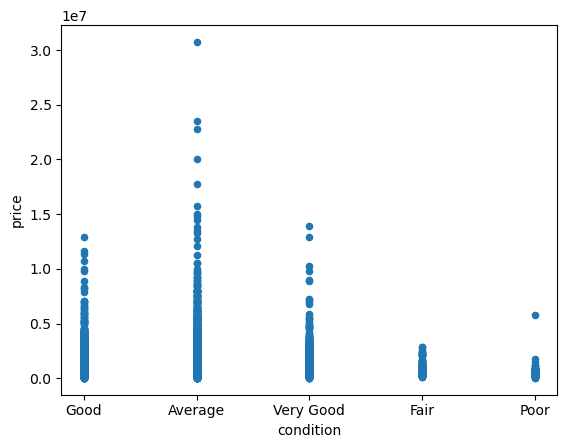

In [63]:
df.plot.scatter(x="condition", y="price");

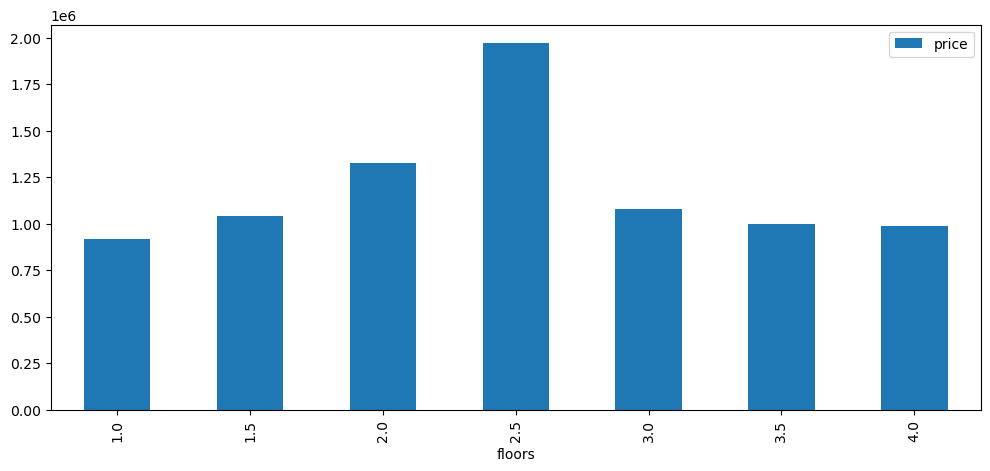

In [112]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby("floors").mean().plot.bar(y="price", ax=ax);

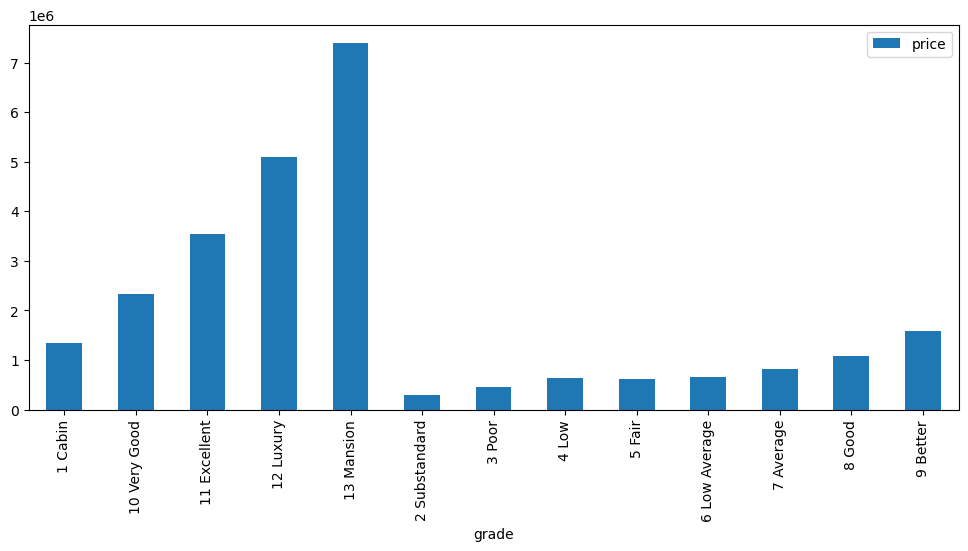

In [113]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby("grade").mean().plot.bar(y="price", ax=ax);

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g 

Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [101]:
X1 = df1[['sqft_living', 'condition_Fair', 'condition_Good', 'condition_Average',
       'condition_Very Good', 'bathrooms']]

In [102]:
model1 = sm.OLS(y, sm.add_constant(X1))
model1_results = model1.fit()

print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2968.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        06:53:57   Log-Likelihood:            -4.4910e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30148   BIC:                         8.983e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.203e+04   8

In [104]:
X2 = df1[['sqft_living', 'bathrooms']]

model2 = sm.OLS(y, sm.add_constant(X2))
model2_results = model2.fit()

print(model2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8875.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        06:55:37   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.598e+04   1.15e+04     -8.318      

In [105]:
X3 = df1[['sqft_living', 'sqft_patio']]

model3 = sm.OLS(y, sm.add_constant(X3))
model3_results = model3.fit()

print(model3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     9104.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        06:58:49   Log-Likelihood:            -4.4897e+05
No. Observations:               30155   AIC:                         8.980e+05
Df Residuals:                   30152   BIC:                         8.980e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.654e+04   9735.219     -7.863      

In [108]:
X4 = df1[['sqft_living', 'bedrooms']]

model4 = sm.OLS(y, sm.add_constant(X4))
model4_results = model4.fit()

print(model4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     9320.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        07:05:05   Log-Likelihood:            -4.4884e+05
No. Observations:               30155   AIC:                         8.977e+05
Df Residuals:                   30152   BIC:                         8.977e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.898e+04   9876.045     -2.934      

In [111]:
X5 = df1[['sqft_living', 'bathrooms', 'floors']]

model5 = sm.OLS(y, sm.add_constant(X5))
model5_results = model5.fit()

print(model5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5919.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        07:19:34   Log-Likelihood:            -4.4911e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30151   BIC:                         8.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.023e+04   1.37e+04     -5.845      

In [118]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=["grade"]) #, drop_first=True
df2.drop('grade_7 Average', axis=1, inplace=True)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

In [123]:
X6 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better']]

In [122]:
model6 = sm.OLS(y, sm.add_constant(X6))
model6_results = model6.fit()

print(model6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1847.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        07:28:14   Log-Likelihood:            -4.4676e+05
No. Observations:               30155   AIC:                         8.935e+05
Df Residuals:                   30140   BIC:                         8.937e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.536e+05   1